## Problem Statement
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement :

What is the likelihood of an active employee leaving the company?

What are the key indicators of an employee leaving the company?

What policies or strategies can be adopted based on the results to improve employee retention?

## Importing Python liabraries

In [1]:
import pandas as pd #data processing
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

Let us load in the dataset via the trusty Pandas package into a dataframe object and have a quick look at the first few rows

In [3]:
data=pd.read_csv("Hr_data.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


As observed from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

Furthermore, we see that we have a mix of numerical and categorical data types. For the categorical columns, later on we shall handle them by numerical encoding.

#### Data quality checks

To look for any null values, we can just invoke the isnull call as follows

In [97]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Correlation of Features
By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

In this correlation plot, I will use the the seaborn library to produce a interactive Pearson correlation matrix via the Heatmap function as follows:

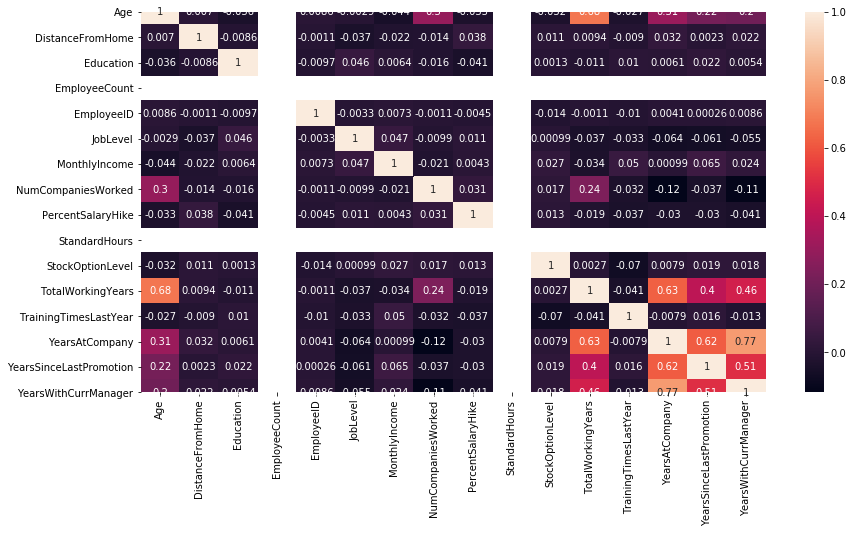

In [99]:
plt.figure(figsize=(14,7))
corelation=data.corr()
sns.heatmap(corelation,annot=True)

### Takeaway from the plots

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. 

In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.

Analysis of correlation results (sample analysis):

-Monthly income is highly correlated with Job level.

-Job level is highly correlated with total working hours.

-Monthly income is highly correlated with total working hours.

-Age is also positively correlated with the Total working hours.

-Marital status and stock option level are negatively correlated

### Pairplot Visualisations
Now let us create some Seaborn pairplots and set it against the target variable which is our Attrition column to get a feel for how the various features are distributed.

Having identified which of our features contain categorical data, we can set about numerically encoding the data. To do this, I shall use the get_dummies method from Pandas which creates encoded dummy variables from the categorical variables.


In [7]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [68]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [21]:
data.fillna(0,axis=1,inplace=True)

# 1.Explonatory Data Analysis

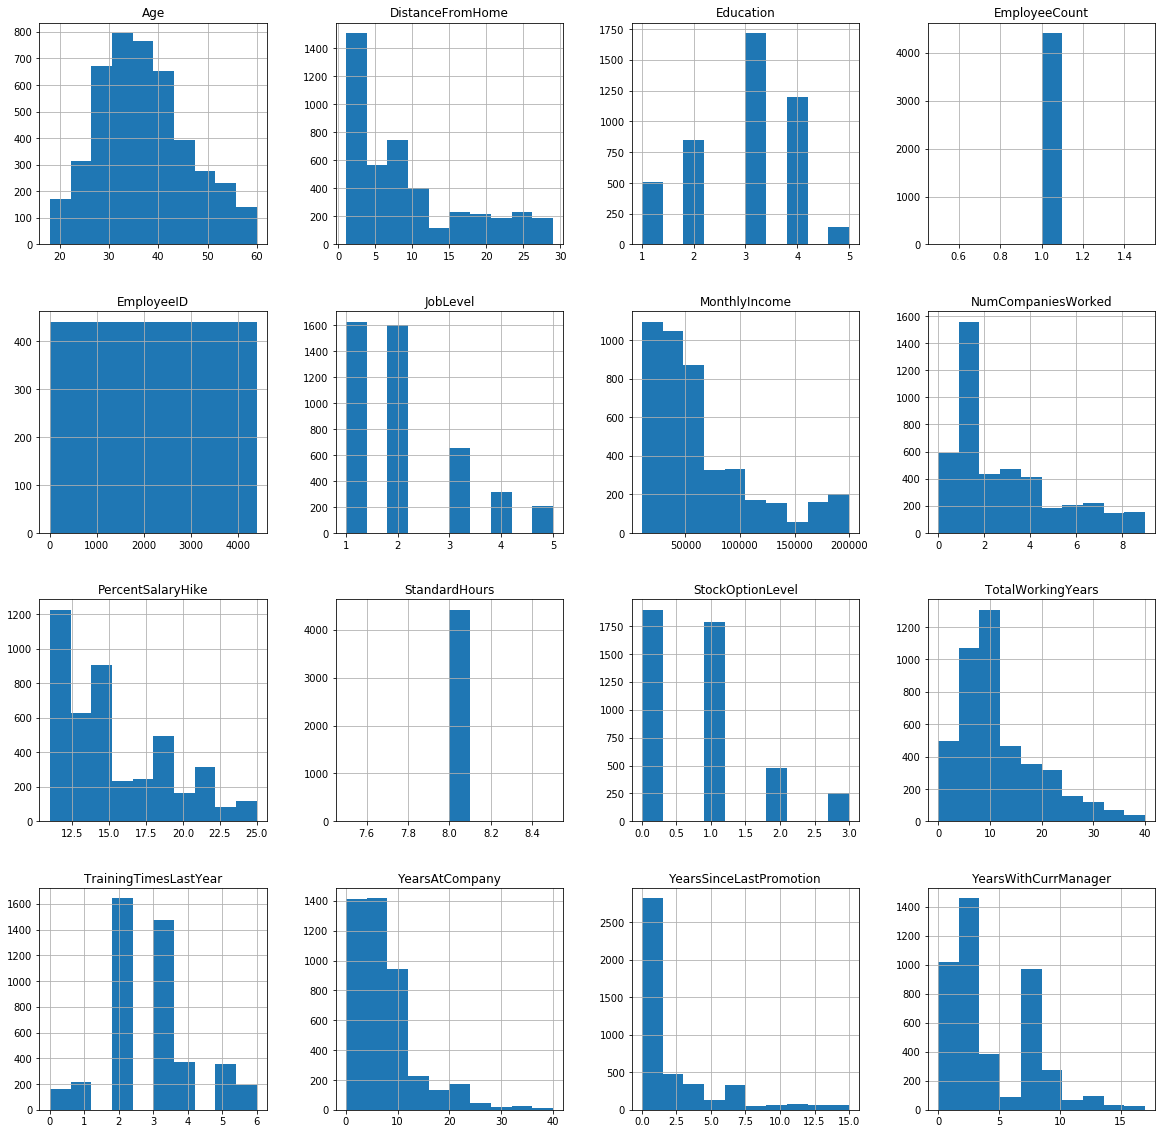

In [3]:
#Univariate analysis
data.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

-Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany).
Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

-Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

-EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

-Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [12]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Categorical Featues

In [20]:
for columns in data.columns:
    print(f"{columns}:Number of unique values {data[columns].nunique()}")

Age:Number of unique values 43
Attrition:Number of unique values 2
BusinessTravel:Number of unique values 3
Department:Number of unique values 3
DistanceFromHome:Number of unique values 29
Education:Number of unique values 5
EducationField:Number of unique values 6
EmployeeCount:Number of unique values 1
EmployeeID:Number of unique values 4410
Gender:Number of unique values 2
JobLevel:Number of unique values 5
JobRole:Number of unique values 9
MaritalStatus:Number of unique values 3
MonthlyIncome:Number of unique values 1349
NumCompaniesWorked:Number of unique values 10
Over18:Number of unique values 1
PercentSalaryHike:Number of unique values 15
StandardHours:Number of unique values 1
StockOptionLevel:Number of unique values 4
TotalWorkingYears:Number of unique values 40
TrainingTimesLastYear:Number of unique values 7
YearsAtCompany:Number of unique values 37
YearsSinceLastPromotion:Number of unique values 16
YearsWithCurrManager:Number of unique values 18


In [57]:
for column in data.columns:
    print(f"{column}: {data[column].dtype==object}")

Age: False
Attrition: True
BusinessTravel: True
Department: True
DistanceFromHome: False
Education: False
EducationField: True
EmployeeCount: False
EmployeeID: False
Gender: True
JobLevel: False
JobRole: True
MaritalStatus: True
MonthlyIncome: False
NumCompaniesWorked: False
Over18: True
PercentSalaryHike: False
StandardHours: False
StockOptionLevel: False
TotalWorkingYears: False
TrainingTimesLastYear: False
YearsAtCompany: False
YearsSinceLastPromotion: False
YearsWithCurrManager: False


In [56]:
print(data['Attrition'].unique())
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['MaritalStatus'].unique())
print(data['Over18'].unique())

['No' 'Yes']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Married' 'Single' 'Divorced']
['Y']


### Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
# Label Encoding will be used for columns with 2 or less unique values
le_count =[]
for col in data.columns:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count.append(col)
print('{} columns were label encoded.'.format(le_count))

['Attrition', 'Gender', 'Over18'] columns were label encoded.


In [35]:
# convert rest of categorical variable into dummy
data = pd.get_dummies(data, drop_first=True)

In [36]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,0,1,131160,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,1,2,0,1,41890,0.0,...,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,1,3,1,4,193280,1.0,...,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,1,4,1,3,83210,3.0,...,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,1,5,1,1,23420,4.0,...,0,0,0,0,0,0,1,0,0,1


# Data Visualization

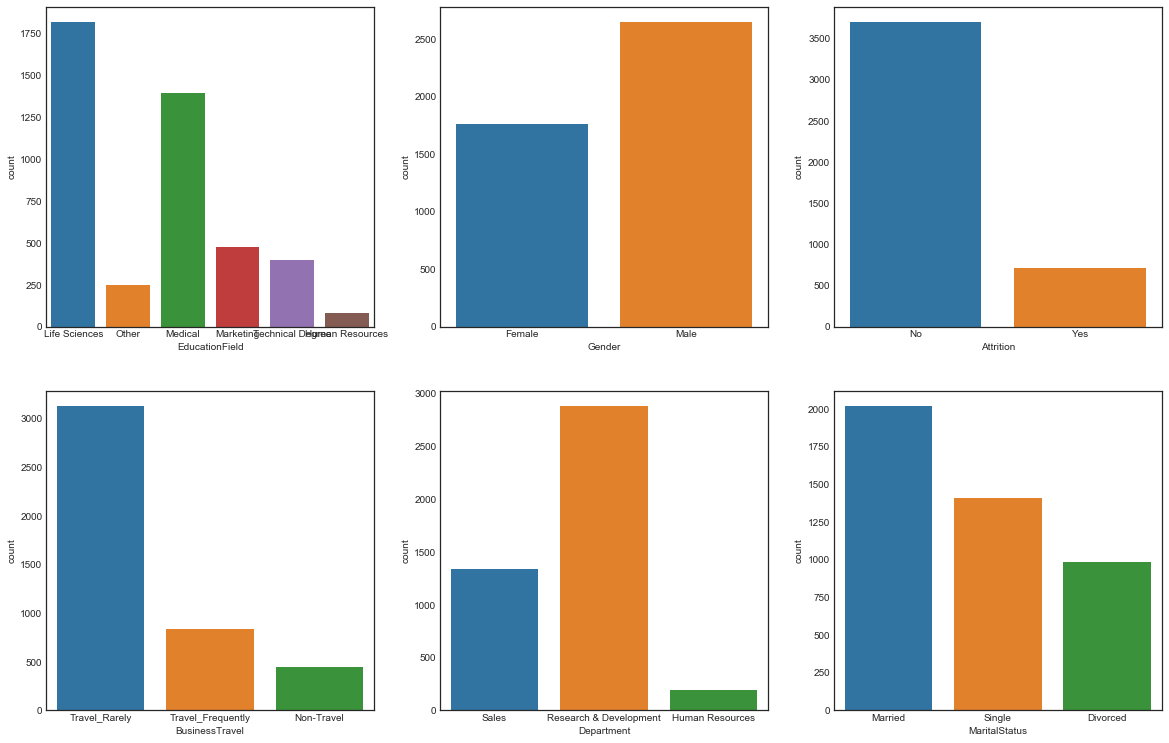

In [16]:
plt.figure(figsize = (25, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.subplot(332)
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.subplot(333)
sns.countplot(data['Attrition'])
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.subplot(334)
sns.countplot(data.BusinessTravel)
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.subplot(335)
sns.countplot(data.Department)
fig = plt.gcf()
fig.set_size_inches(20,20)

plt.subplot(336)
sns.countplot(data.MaritalStatus)
fig = plt.gcf()
fig.set_size_inches(20,20)



### Inferences:

Candidates who has done their bachelor degree in Life Science are employeed more

There are more male employees

Majority of the employees show greater Attrition

Majority of the employees are married

Majority of the employees seem to travel rarely

Majority of the employees are from research & development department

### Visualizing Distribution of features

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future

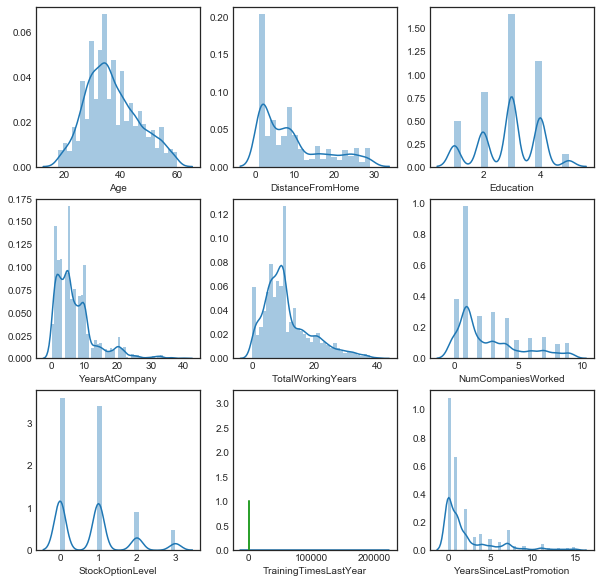

In [25]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.distplot(data['Age'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.distplot(data['DistanceFromHome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.distplot(data['Education'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.distplot(data['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(335)
sns.distplot(data['TotalWorkingYears'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.distplot(data['NumCompaniesWorked'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.distplot(data['StockOptionLevel'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.distplot(data['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(339)

plt.subplot(338)
sns.distplot(data['YearsWithCurrManager'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(339)
sns.distplot(data['YearsSinceLastPromotion'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(338)
sns.distplot(data['TrainingTimesLastYear'])
fig = plt.gcf()
fig.set_size_inches(10,10)


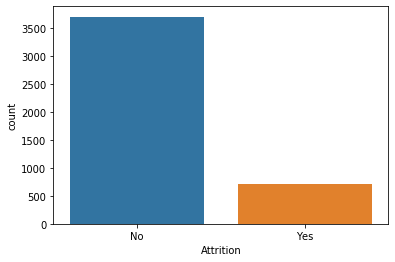

In [43]:
sns.countplot(x='Attrition',data=data)

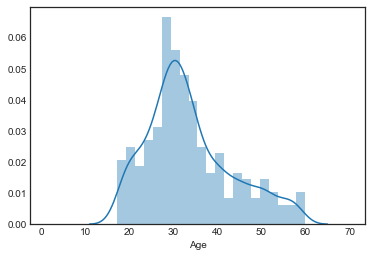

In [26]:
sns.distplot(data.Age[data.Attrition == 'Yes'], bins = np.linspace(1,70,35))

Peoples of age 25 to 35 tends to more attrition

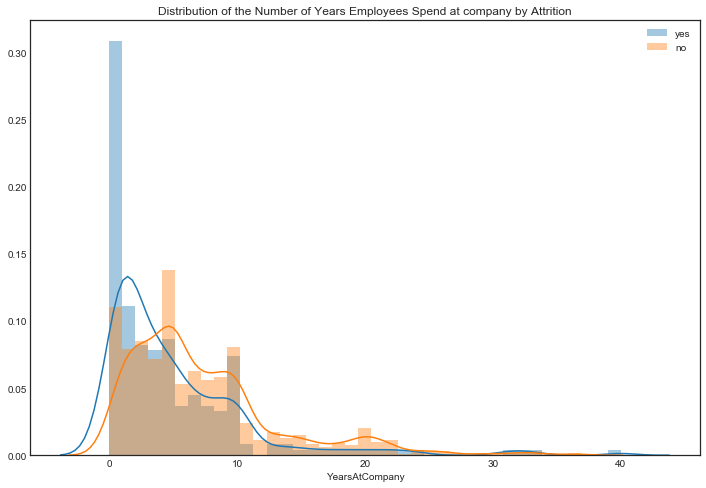

In [31]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Distribution of the Number of Years Employees Spend at company by Attrition')
sns.distplot(data.YearsAtCompany[data.Attrition == 'Yes'], bins = np.linspace(0,40,40))
sns.distplot(data.YearsAtCompany[data.Attrition == 'No'], bins = np.linspace(0,40,40))
plt.legend(['yes','no'])

Two takeaways:

The highest attrition rate occurs in the first year of the job. Over 20% of all employees who left did so in their first year.

The vast majority of the workforce has been at company for under 10 years. Perhaps only the best and brightest get the privledge to continue on after 10 years.

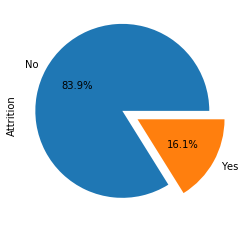

In [118]:
data.groupby('Attrition').Attrition.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1))

Here we can see that number of employees staying in the company are more than the pepoples laeving the company,
84% of employees did not quit the organization while 16% did leave the organization.
so there is quite large skewness in the target variable.

There are many techniques to handle the imbalance in the data (oversampling or undersampling).I will use oversampling technique known as SMOTE to treat this imbalance.

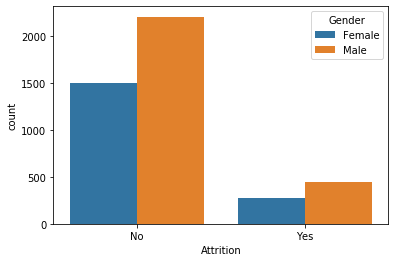

In [45]:
sns.countplot(x='Attrition',data=data,hue='Gender')

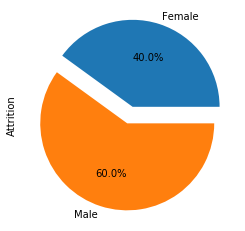

In [19]:
data.groupby('Gender').Attrition.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1))

Gender distribution shows that the dataset features a higher relative proportion of male  than female , with normalised gender distribution of ex-employees in the dataset at 60.0% for Males and 40% for Females.

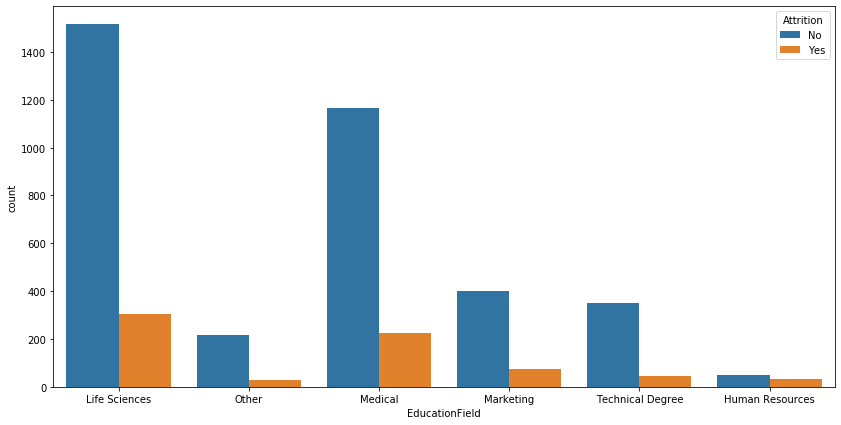

In [6]:
plt.figure(figsize=(14,7))
sns.countplot(x='EducationField',data=data,hue='Attrition')

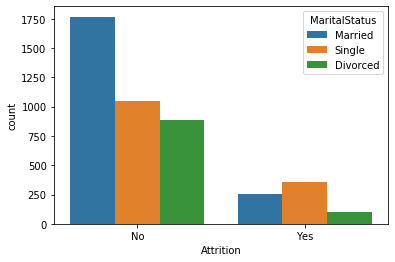

In [16]:
sns.countplot(x='Attrition',data=data,hue='MaritalStatus')

Single employees shows the largest proportion of leavers.

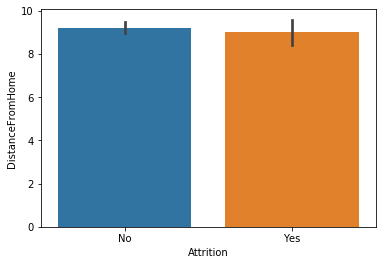

In [4]:
sns.barplot(x='Attrition',y='DistanceFromHome',data=data)

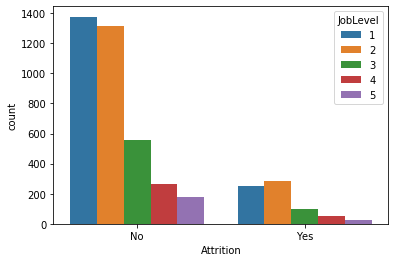

In [46]:
sns.countplot(x='Attrition',data=data,hue='JobLevel')

In [37]:
data.drop(['EmployeeCount','EmployeeID'],axis=1,inplace=True)

## Implementing Machine Learning Models

After performing some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

### Splitting Data into Train and Test sets
But before we even start training a model, we will have to partition our dataset into a training set and a test set using sklearn.

In [38]:
#Split data into training and Testing set:
#Choose dependent and independent var
#here dependent var is Attrition and rest of the var are indepdent var.
X=data.drop('Attrition',axis=1)
y=data['Attrition']

In [39]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [42]:
#import some comman libs:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8458049886621315
[[723  18]
 [118  23]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       741
           1       0.56      0.16      0.25       141

    accuracy                           0.85       882
   macro avg       0.71      0.57      0.58       882
weighted avg       0.81      0.85      0.81       882



## Random Forest Classifier
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [112]:
seed=0 # We set our random seed to zero for reproducibility
rf_model=RandomForestClassifier(n_jobs= -1,
    n_estimators=1000,
#     'warm_start'= True, 
    max_features= 0.3,
    max_depth= 4,
    min_samples_leaf= 2,
    #max_features = 'sqrt',
    random_state = seed,
    verbose= 0)

In [ ]:
rf_model.fit(X_train,y_train)

Having fitted our forest of trees with our parameters to the training set against our target variable, we now have a learning model rf which we can make predictions out of. To use our Random Forest in predicting against our test data, we can use sklearn's .predict method as follows

In [ ]:
y_pred=rf_model.predict(X_test)

In [115]:
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))

Accuracy_score: 0.8401360544217688
Classification report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       741
           1       0.00      0.00      0.00       141

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.71      0.84      0.77       882



# Gradient Boosting Classifier


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
y_pred=gbc_clf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))

Accuracy_score: 0.8832199546485261
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       741
           1       0.90      0.30      0.46       141

    accuracy                           0.88       882
   macro avg       0.89      0.65      0.69       882
weighted avg       0.88      0.88      0.86       882



# XGBoost

In [51]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_ped=xgb_clf.predict(X_test)

In [52]:
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))
print("Confusion matrix:","\n",confusion_matrix(y_test,y_pred))

Accuracy_score: 0.8832199546485261
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       741
           1       0.90      0.30      0.46       141

    accuracy                           0.88       882
   macro avg       0.89      0.65      0.69       882
weighted avg       0.88      0.88      0.86       882

Confusion matrix: 
 [[736   5]
 [ 98  43]]


# Conclusions:
    

## .DistanceFromHome: 
    Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.

## .TotalWorkingYears: 
    The more experienced employees are less likely to leave. 
    Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.

## .YearsAtCompany: 
    Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

## .Age: 
    Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

## .Monthly Income: 
    people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.